<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana11/MediaMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana11')
!ls

Data  MediaMovil.ipynb


In [4]:
data = pd.read_csv('Data/MediaMovilData.csv')
data

,Ventas
0,1250
1,1150
2,970
3,1100
4,1170
5,1080
6,1120
7,1230
8,1210
9,1050


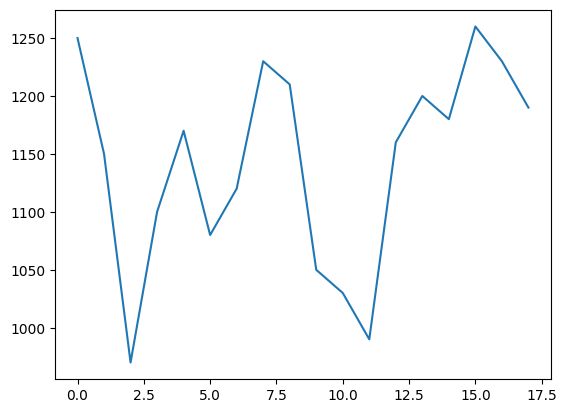

In [5]:
# COntexto: ventas en dolares de un almacen durando 18 dias
# Tarea: Elaborar un modelo que prediga la venta en el día 19
# Modelo: Definimos un modelo: Alejandro dice "sencillo - regresion"
import matplotlib.pyplot as plt
import numpy as np
x = np.array((data.Ventas))
plt.plot(x)

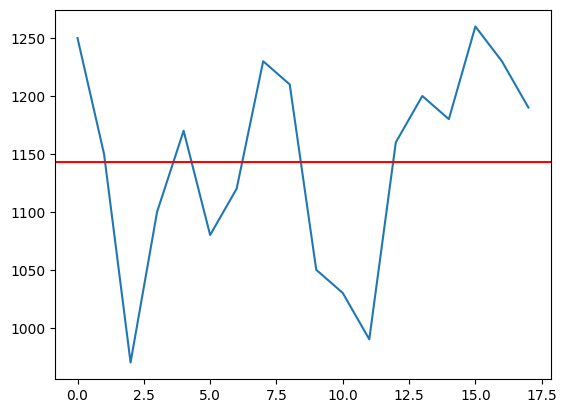

In [6]:
# estudiante de primer semestre
mean = np.mean(data.Ventas)
plt.plot(x)
plt.axhline(y=mean, color='r', linestyle='-')

In [7]:
# Queremos constriuir una media movil
def GetMediaMovil(x,n):

  media = np.zeros((len(x)+1)) # Incluyo la prediccion

  for i in range(len(media)):

    sum_ = 0.

    if i > n:

      for j in range(i-n,i):

        sum_ += x[j]

      media[i] = sum_/n

    else:
      media[i] = x[i]

  return media


In [8]:
media = GetMediaMovil(x,3)

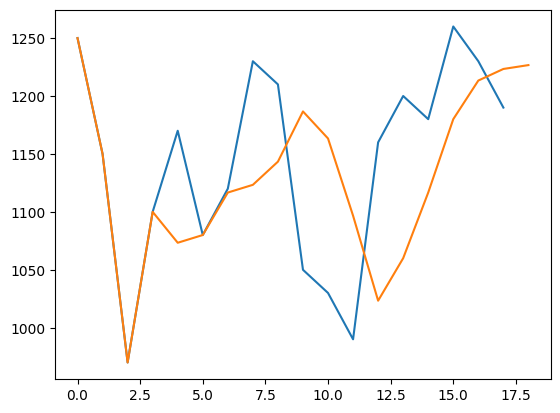

In [9]:
plt.plot(x)
plt.plot(media,label='media movil standard')

In [10]:
media[-1]

np.float64(1226.6666666666667)

In [11]:
# Media movil ponderada
# El vector de ponderacion
# SI metos 0.75,0.25
def GetMediaMovilPonderada(x,w):

  n = len(w)
  media = np.zeros((len(x)+1))

  for i in range(len(media)):

    sum_ = 0.

    if i >= n:

      k = 0
      for j in range(i-n,i):

        sum_ += w[k]*x[j]

        k += 1

      media[i] = sum_

    else:
      media[i] = x[i]

  return media

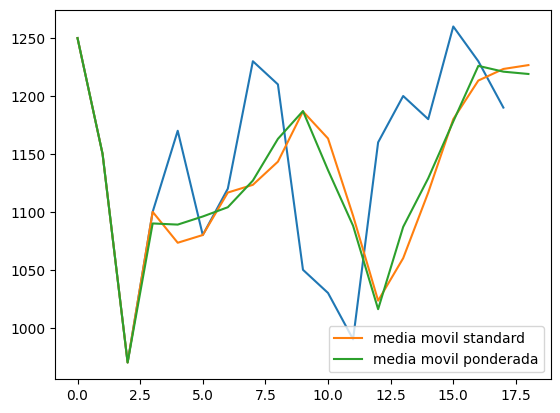

In [12]:
w = np.array([0.3,0.2,0.5])
Wmedia = GetMediaMovilPonderada(x,w)
plt.plot(x)
plt.plot(media,label='media movil standard')
plt.plot(Wmedia,label='media movil ponderada')
plt.legend()

In [13]:
# Necesitamos una metrica de rendimiento:
# Valor cuadratico media
# Valor absoluto media
# Entropia cruzada

In [14]:
def GetRSS(x,y):
  # Ahora implementando AIC
  RSS = np.sum((x-y)**2)
  return RSS

In [15]:
GetRSS(x,Wmedia[:-1])

np.float64(103407.0)

In [16]:
def restriccion(w):
  return np.sum(w) - 1

In [17]:
import scipy.optimize as sp

In [39]:
def Cost(w):


  Wmedia = GetMediaMovilPonderada(x,w)
  RSS = GetRSS(x,Wmedia[:-1])
  n = len(x)
  k = w.shape[0]

  AIC = n*np.log(RSS/n) + 2.*k


  # Correccion para pequeñas muestras
  k_eff = k - 1  # Grados de libertad por la restricción
  n_eff = len(x) - k_eff # Grades de libertad estadísticos
  AICc = AIC + (2*k_eff*(k_eff+1)) / max(1, (n_eff - k_eff - 1))

  return AICc

In [40]:
w0 = np.array([0.5,0.2,0.3])
n = len(w0)
constraints = ( {'type':'eq', 'fun': restriccion} )
bounds = [(0,1) for _ in range(n)]
result = sp.minimize(Cost,w0,method='SLSQP',bounds=bounds,constraints=constraints)
result

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 159.85351737334608
           x: [ 2.832e-01  8.060e-14  7.168e-01]
         nit: 5
         jac: [-1.036e+02 -9.482e+01 -1.036e+02]
        nfev: 20
        njev: 5
 multipliers: [-1.036e+02]

In [41]:
AIC = result.fun

In [42]:
print(AIC)
np.round(result.x,2)

159.85351737334608


array([0.28, 0.  , 0.72])

In [43]:
wopt = result.x

In [44]:
meanopt = GetMediaMovilPonderada(x,wopt)

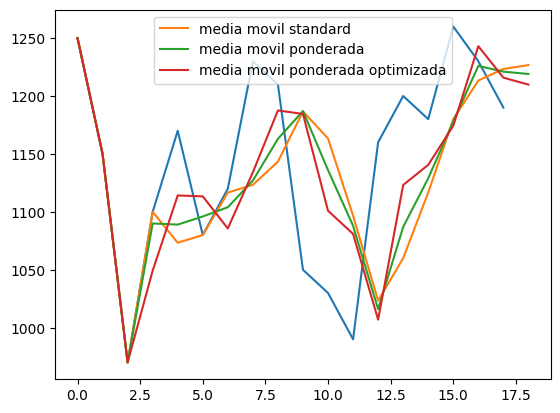

In [45]:
plt.plot(x)
plt.plot(media,label='media movil standard')
plt.plot(Wmedia,label='media movil ponderada')
plt.plot(meanopt,label='media movil ponderada optimizada')
plt.legend()

In [53]:
def OptimizarModelo():

  AIC = []
  kday = []
  wopt = []

  for n in range(2,8):

    w0 = np.ones(n)
    w0 = w0/n

    constraints = ( {'type':'eq', 'fun': restriccion} )
    bounds = [(0,1) for _ in range(n)]
    result = sp.minimize(Cost,w0,bounds=bounds,constraints=constraints)
    print( 'optimal:', result.x)

    AIC.append(result.fun)
    kday.append(n)
    wopt.append(result.x)

  return kday,AIC,wopt

In [54]:
kday,AIC,wopt = OptimizarModelo()

optimal: [0.00262774 0.99737226]
optimal: [0.28319059 0.         0.71680941]
optimal: [0.08454914 0.15545947 0.         0.75999139]
optimal: [5.47324606e-02 5.27055071e-15 1.79867034e-01 0.00000000e+00
 7.65400505e-01]
optimal: [1.95471042e-01 6.16913272e-14 5.24919710e-02 1.03928910e-14
 2.90352465e-13 7.52036987e-01]
optimal: [3.90190216e-01 6.50313137e-14 0.00000000e+00 0.00000000e+00
 2.29887723e-13 4.21446298e-13 6.09809784e-01]


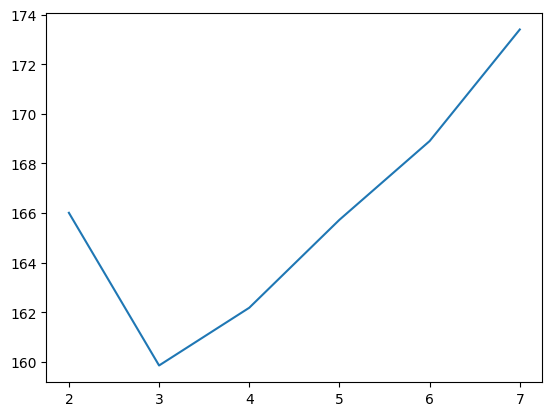

In [55]:
plt.plot(kday,AIC)

In [56]:
wopt

[array([0.00262774, 0.99737226]),
 array([0.28319059, 0.        , 0.71680941]),
 array([0.08454914, 0.15545947, 0.        , 0.75999139]),
 array([5.47324606e-02, 5.27055071e-15, 1.79867034e-01, 0.00000000e+00,
        7.65400505e-01]),
 array([1.95471042e-01, 6.16913272e-14, 5.24919710e-02, 1.03928910e-14,
        2.90352465e-13, 7.52036987e-01]),
 array([3.90190216e-01, 6.50313137e-14, 0.00000000e+00, 0.00000000e+00,
        2.29887723e-13, 4.21446298e-13, 6.09809784e-01])]

In [57]:
wopt[1]

array([0.28319059, 0.        , 0.71680941])